In [1]:
# import classy module
from classy import Class
import matplotlib.pyplot as plt
from math import pi

In [18]:
gamma = 127
alpha = 7/3.
nothing = 0
eps = 0
phi_ini = -10.
phi_dot_ini = 0.
comma = ','

scf_param_vec = str(gamma)+comma+str(alpha)+comma+str(nothing)+comma+str(eps)+comma+str(phi_ini)+comma+str(phi_dot_ini)

common_params = {'omega_b':0.0223828,
				'omega_cdm':0.1201075,
				'h':0.67810,
				'A_s':2.100549e-09,
				'n_s':0.9660499,
				'tau_reio':0.05430842,
				'output':'tCl,pCl,lCl,mPk',
				'lensing':'yes',
				'P_k_max_1/Mpc': 3.0,
				'Omega_fld': 0,
				'Omega_scf': -1,
				'Omega_Lambda': 0,
				'scf_parameters': scf_param_vec,
				'attractor_ic_scf': 'no',
				'scf_tuning_index': 0
				}

In [20]:
# create instance of the class "Class"
LambdaCDM = Class()
# pass input parameters
LambdaCDM.set(common_params)
# run class
LambdaCDM.compute()

In [21]:
# get all C_l output
cls = LambdaCDM.lensed_cl(2500)
# To check the format of cls
cls.keys()

dict_keys(['tt', 'ee', 'te', 'bb', 'pp', 'tp', 'ell'])

In [22]:
ll = cls['ell'][2:]
clTT = cls['tt'][2:]
clEE = cls['ee'][2:]
clPP = cls['pp'][2:]

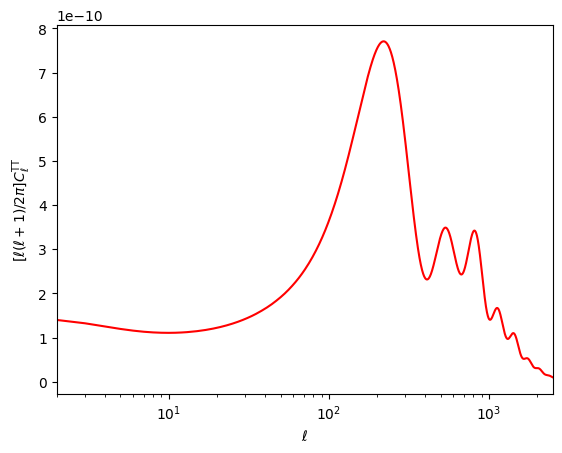

In [23]:
# plot C_l^TT
plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi,'r-')
plt.show()

In [25]:
# optional: reset parameters to default in case you want 
# to set different parameters and rerun LambdaCDM.compute()
LambdaCDM.empty()

In [38]:
alphas = [1/3., 2., 2.5, 3.]
cls_loop = []


for alpha in alphas:
    scf_param_vec = str(gamma)+comma+str(alpha)+comma+str(nothing)+comma+str(eps)+comma+str(phi_ini)+comma+str(phi_dot_ini)
    common_params = {'omega_b':0.0223828,
				'omega_cdm':0.1201075,
				'h':0.67810,
				'A_s':2.100549e-09,
				'n_s':0.9660499,
				'tau_reio':0.05430842,
				'output':'tCl,pCl,lCl,mPk',
				'lensing':'yes',
				'P_k_max_1/Mpc': 3.0,
				'Omega_fld': 0,
				'Omega_scf': -1,
				'Omega_Lambda': 0,
				'scf_parameters': scf_param_vec,
				'attractor_ic_scf': 'no',
				'scf_tuning_index': 0
				}
    # create instance of the class "Class"
    LambdaCDM = Class()
    # pass input parameters
    LambdaCDM.set(common_params)
    # run class
    LambdaCDM.compute()
    cls_loop.append(LambdaCDM.lensed_cl(2500)['tt'][2:])
    LambdaCDM.empty()

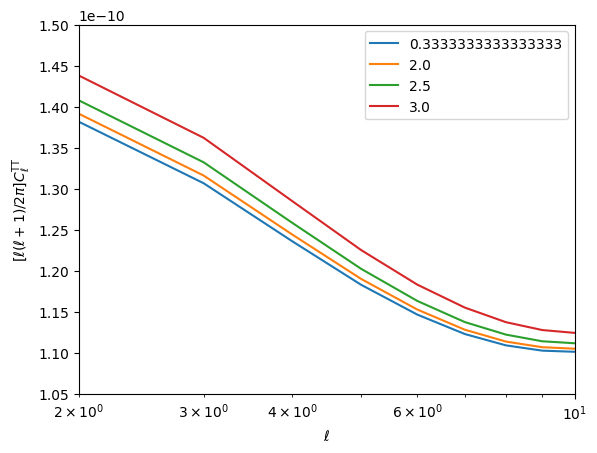

In [39]:
# plot C_l^TT
plt.figure(1)
plt.xscale('log');
plt.yscale('linear');
plt.xlim(2,10);
plt.ylim(1.05e-10,1.5e-10);
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i in range(len(cls_loop)):
    plt.plot(ll,cls_loop[i]*ll*(ll+1)/2./pi,'-', label=str(alphas[i]))
plt.legend(loc='upper right')
plt.show()